In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_AN_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6,148,72,35,NaN,33.6,0.627,NaN
1,1,85,66,29,0.0,NaN,0.351,NaN
2,8,183,64,0,NaN,23.3,0.672,NaN
3,1,89,66,23,94.0,28.1,0.167,21.0
4,0,137,40,35,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63.0
764,2,122,70,27,0.0,36.8,0.340,27.0
765,5,121,72,23,NaN,NaN,0.245,30.0
766,1,126,60,0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
int64		column 3	0
int64		column 4	0
float64		column 5	95
float64		column 6	76
float64		column 7	0
float64		column 8	133


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,768.000000,768.000000,768.000000,768.000000,673.000000,692.000000,768.000000,635.000000
mean,3.845052,120.894531,69.105469,20.536458,79.493314,32.005780,0.471876,33.151181
std,3.369578,31.972618,19.355807,15.952218,115.190165,7.866246,0.331329,11.694824
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.300000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,129.000000,36.600000,0.626250,40.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,72.000000


<AxesSubplot:>

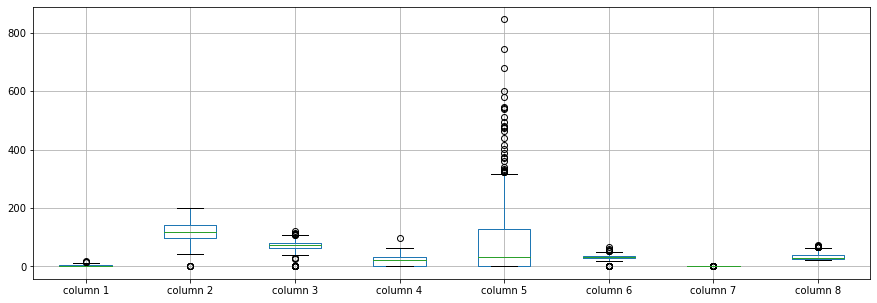

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.845052
column 2    120.894531
column 3     69.105469
column 4     20.536458
column 5     79.493314
column 6     32.005780
column 7      0.471876
column 8     33.151181
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.129459,0.141282,-0.081672,-0.086151,0.000481,-0.033523,0.532980
column 2,0.129459,1.000000,0.152590,0.057328,0.341489,0.216976,0.137337,0.274367
column 3,0.141282,0.152590,1.000000,0.207371,0.063296,0.279977,0.041265,0.243401
column 4,-0.081672,0.057328,0.207371,1.000000,0.432787,0.388432,0.183928,-0.131304
column 5,-0.086151,0.341489,0.063296,0.432787,1.000000,0.177662,0.181366,-0.067487
column 6,0.000481,0.216976,0.279977,0.388432,0.177662,1.000000,0.126509,0.025790
column 7,-0.033523,0.137337,0.041265,0.183928,0.181366,0.126509,1.000000,0.044612
column 8,0.532980,0.274367,0.243401,-0.131304,-0.067487,0.025790,0.044612,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+31,8+31+31,8+31+31+31,8+31+31+31+31,8+31+31+31+31+31,8+31+31+31+31,8+31+31+31,8+31+31,8+31,8], vae_layer = False, seed = 31)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 401.63510767618817
Epoch: 1 , loss: 401.12499109903973
Epoch: 2 , loss: 401.3148384094238
Epoch: 3 , loss: 401.83218320210773
Epoch: 4 , loss: 400.052942276001
Epoch: 5 , loss: 393.8705590565999
Epoch: 6 , loss: 379.67637125651044
Epoch: 7 , loss: 371.01276842753094
Epoch: 8 , loss: 363.64408111572266
Epoch: 9 , loss: 363.0625534057617
Epoch: 10 , loss: 358.61153984069824
Epoch: 11 , loss: 353.12084007263184
Epoch: 12 , loss: 348.6135718027751
Epoch: 13 , loss: 346.9965534210205
Epoch: 14 , loss: 343.12770144144696
Epoch: 15 , loss: 338.14922459920246
Epoch: 16 , loss: 332.2623821894328
Epoch: 17 , loss: 325.2994041442871
Epoch: 18 , loss: 318.27666759490967
Epoch: 19 , loss: 318.6808090209961
Epoch: 20 , loss: 312.96053345998126
Epoch: 21 , loss: 304.840970993042
Epoch: 22 , loss: 311.0008586247762
Epoch: 23 , loss: 304.7786115010579
Epoch: 24 , loss: 301.24749120076496
Epoch: 25 , loss: 294.6796948115

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0,0,0,0,46.618786,0.000000,0.0,-23.534863
1,0,0,0,0,0.000000,-11.863754,0.0,-15.946600
2,0,0,0,0,29.136774,0.000000,0.0,-15.039661
3,0,0,0,0,0.000000,0.000000,0.0,0.000000
4,0,0,0,0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...
763,0,0,0,0,0.000000,0.000000,0.0,0.000000
764,0,0,0,0,0.000000,0.000000,0.0,0.000000
765,0,0,0,0,-87.663696,-12.264741,0.0,0.000000
766,0,0,0,0,0.000000,0.000000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1265.020276403935, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.218991357840733

In [18]:
new_df.iloc[66,:]

column 1      0.000
column 2    109.000
column 3     88.000
column 4     30.000
column 5      0.000
column 6     32.500
column 7      0.855
column 8     38.000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6,148,72,35,46.618786,33.600000,0.627,26.465137
1,1,85,66,29,0.000000,14.736246,0.351,15.053400
2,8,183,64,0,29.136774,23.300000,0.672,16.960339
3,1,89,66,23,94.000000,28.100000,0.167,21.000000
4,0,137,40,35,168.000000,43.100000,2.288,33.000000
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.000000,32.900000,0.171,63.000000
764,2,122,70,27,0.000000,36.800000,0.340,27.000000
765,5,121,72,23,24.336304,13.935259,0.245,30.000000
766,1,126,60,0,0.000000,30.100000,0.349,47.000000


In [20]:
imputations[-1].to_excel("PID_AN_5.xlsx", index=False, header=False)